In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = forest_fires_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [3]:
data_4

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.00
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.00
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.00
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.00
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,6.44
513,-1.153631,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,54.29
514,1.007337,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,11.16
515,-1.585825,-0.243765,0.230308,0.839784,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,0.00


In [4]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [5]:
import random

iterations = 15

param_space = {
    'lr': [0.01,0.001,0.0001],
    'epochs': np.linspace(1000, 20000, num=20).astype(int).tolist()
}

best_score = float('inf')
best_params_linear = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=False)):
    
        train_data = train_set.to_numpy()
        X_train = train_data[:,:-1]
        y_train = train_data[:,-1:]

        data_test = data_val.to_numpy()
        X_val = data_test[:,:-1]
        y_val = data_test[:,-1:]
        
        linear = LinearNetwork(config)

        _, val_losses = linear.linear_regression(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=500)

        score = np.min(val_losses)
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 20000:
            print(f"Skipping params: {params} due to high score: {score}")
            break  # Exit the current for-loop
        
    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_linear = params
        

print(f"Best parameters: {best_params_linear}, Best score: {best_score}")


Tested params: {'lr': 0.01, 'epochs': 16000}, Score: 11819.780022251009
Tested params: {'lr': 0.0001, 'epochs': 13000}, Score: 11828.787510428112
Tested params: {'lr': 0.01, 'epochs': 17000}, Score: 11819.780931823669
Tested params: {'lr': 0.001, 'epochs': 7000}, Score: 11820.36575148849
Tested params: {'lr': 0.0001, 'epochs': 16000}, Score: 11824.882212850265
Tested params: {'lr': 0.001, 'epochs': 10000}, Score: 11820.133409512215
Tested params: {'lr': 0.001, 'epochs': 14000}, Score: 11819.993792405912
Tested params: {'lr': 0.0001, 'epochs': 5000}, Score: 11889.59319662521
Tested params: {'lr': 0.0001, 'epochs': 6000}, Score: 11872.823363443113
Tested params: {'lr': 0.0001, 'epochs': 9000}, Score: 11843.760521772716
Tested params: {'lr': 0.0001, 'epochs': 15000}, Score: 11825.828948611146
Tested params: {'lr': 0.01, 'epochs': 14000}, Score: 11819.788488746464
Tested params: {'lr': 0.001, 'epochs': 3000}, Score: 11821.248063406603
Tested params: {'lr': 0.0001, 'epochs': 11000}, Score: 

In [6]:
import random

iterations = 15

param_space = {
    'lr': [0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(2000, 20000, 2000).tolist(),
    'n_hidden': np.arange(2*X_val.shape[1], 80, 15)
}

best_score = float('inf')
best_params_ffn = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=False)):
           
        train_data = train_set.to_numpy()
        X_train = train_data[:,:-1]
        y_train = train_data[:,-1:]

        data_test = data_val.to_numpy()
        X_val = data_test[:,:-1]
        y_val = data_test[:,-1:]

        ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=params['n_hidden'],n_hidden_2=params['n_hidden'],n_output=y_train.shape[1])

        _, val_losses, _ = ffn.train(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=500)

        score = np.min(val_losses)
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 20000:
            print(f"Skipping params: {params} due to high score: {score}")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_ffn = params
        

print(f"Best parameters: {best_params_ffn}, Best score: {best_score}")


Tested params: {'lr': 1e-05, 'epochs': 10000, 'n_hidden': 24}, Score: 11498.186988527003
Tested params: {'lr': 1e-05, 'epochs': 14000, 'n_hidden': 24}, Score: 11513.23804232743
Tested params: {'lr': 0.0001, 'epochs': 14000, 'n_hidden': 24}, Score: 11219.388976638676
Tested params: {'lr': 1e-06, 'epochs': 10000, 'n_hidden': 69}, Score: 11801.315391473094
Tested params: {'lr': 1e-06, 'epochs': 12000, 'n_hidden': 69}, Score: 11801.243392953105
Tested params: {'lr': 1e-07, 'epochs': 8000, 'n_hidden': 39}, Score: 12109.51509712179
Tested params: {'lr': 0.0001, 'epochs': 16000, 'n_hidden': 39}, Score: 11054.069701419236
Tested params: {'lr': 0.0001, 'epochs': 12000, 'n_hidden': 24}, Score: 11192.01457359001
Tested params: {'lr': 1e-07, 'epochs': 10000, 'n_hidden': 39}, Score: 12094.17687331309
Tested params: {'lr': 0.0001, 'epochs': 6000, 'n_hidden': 39}, Score: 11119.10452062768
Tested params: {'lr': 0.0001, 'epochs': 14000, 'n_hidden': 39}, Score: 11117.69384485923
Tested params: {'lr': 1e

In [7]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_encoder': np.arange(2,X_val.shape[1]-1,1).tolist()
}

best_score = float('inf')
best_params_auto = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=False)):
    
        train_data = train_set.to_numpy()
        X_train = train_data[:,:-1]
        y_train = train_data[:,-1:]

        data_test = data_val.to_numpy()
        X_val = data_test[:,:-1]
        y_val = data_test[:,-1:]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue

        autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=params['n_encoder'])

        losses = autoE.train(X_train, max_epochs=params['epochs'], lr=params['lr'])

        score = np.min(losses)
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_auto = params
        

print(f"Best parameters: {best_params_auto}, Best score: {best_score}")


Skipping params: {'lr': 1e-07, 'epochs': 5000, 'n_encoder': 10} due to high score.
Tested params: {'lr': 1e-07, 'epochs': 5000, 'n_encoder': 10}, Score: 0.8896446470171627
Skipping params: {'lr': 0.0001, 'epochs': 15000, 'n_encoder': 3} due to high score.
Tested params: {'lr': 0.0001, 'epochs': 15000, 'n_encoder': 3}, Score: 0.36345232183022846
Skipping params: {'lr': 1e-06, 'epochs': 5000, 'n_encoder': 4} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 5000, 'n_encoder': 4}, Score: 0.8884484672388151
Skipping params: {'lr': 0.0001, 'epochs': 15000, 'n_encoder': 3} due to high score.
Tested params: {'lr': 0.0001, 'epochs': 15000, 'n_encoder': 3}, Score: 0.3635605953150631
Skipping params: {'lr': 1e-07, 'epochs': 19000, 'n_encoder': 3} due to high score.
Tested params: {'lr': 1e-07, 'epochs': 19000, 'n_encoder': 3}, Score: 0.8889814781702957
Skipping params: {'lr': 1e-06, 'epochs': 13000, 'n_encoder': 4} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 13000, 'n_encod

In [8]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
losses[-1]

0.03222871492591887

In [9]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_hidden_2': np.arange(X_val.shape[1], 100, 15)
}

best_score = float('inf')
best_params_combined = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []
    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=False)):
    
        train_data = train_set.to_numpy()
        X_train = train_data[:,:-1]
        y_train = train_data[:,-1:]

        data_test = data_val.to_numpy()
        X_val = data_test[:,:-1]
        y_val = data_test[:,-1:]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue
        
        combined = CombinedModel(autoE,n_hidden_2=params['n_hidden_2'],n_output=y_val.shape[1])

        _, val_losses, _ = combined.train(X_train,y_train,X_val,y_val,epochs=params['epochs'], lr=params['lr'],patience=500)


        score = np.min(val_losses)
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 20000:
            print(f"Skipping params: {params} due to high score: {score}")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_combined = params
        

print(f"Best parameters: {best_params_combined}, Best score: {best_score}")


Testing params: {'lr': 0.001, 'epochs': 13000, 'n_hidden_2': 12}
Tested params: {'lr': 0.001, 'epochs': 13000, 'n_hidden_2': 12}, Score: 11370.621890064813
Testing params: {'lr': 1e-06, 'epochs': 15000, 'n_hidden_2': 12}
Tested params: {'lr': 1e-06, 'epochs': 15000, 'n_hidden_2': 12}, Score: 11779.616973655495
Testing params: {'lr': 1e-07, 'epochs': 17000, 'n_hidden_2': 12}
Tested params: {'lr': 1e-07, 'epochs': 17000, 'n_hidden_2': 12}, Score: 11904.929435976323
Testing params: {'lr': 1e-07, 'epochs': 13000, 'n_hidden_2': 42}
Tested params: {'lr': 1e-07, 'epochs': 13000, 'n_hidden_2': 42}, Score: 11896.836321112314
Testing params: {'lr': 1e-06, 'epochs': 5000, 'n_hidden_2': 27}
Tested params: {'lr': 1e-06, 'epochs': 5000, 'n_hidden_2': 27}, Score: 11793.131274095216
Testing params: {'lr': 1e-05, 'epochs': 11000, 'n_hidden_2': 12}
Tested params: {'lr': 1e-05, 'epochs': 11000, 'n_hidden_2': 12}, Score: 11664.505041509288
Testing params: {'lr': 1e-07, 'epochs': 5000, 'n_hidden_2': 57}
Te

## Model Performance ##

In [50]:
linear_scores = []
ffn_scores = []
combined_scores = []

for i, (train_set, test_set) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=False)):

    train_data = train_set.to_numpy()
    X_train = train_data[:,:-1]
    y_train = train_data[:,-1:]

    test_data = test_set.to_numpy()
    X_test = test_data[:,:-1]
    y_test = test_data[:,-1:]

    # Check if the shapes of X_train and X_val are not equal
    if X_train.shape[1] != X_test.shape[1]:
        # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
        continue
    
    linear = LinearNetwork(config)
    _, linear_val_losses = linear.linear_regression(X_train,y_train,X_test,y_test,epochs=best_params_linear['epochs'],lr=best_params_linear['lr'],patience=np.inf)

    ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=best_params_ffn['n_hidden'],n_hidden_2=best_params_ffn['n_hidden'],n_output=y_train.shape[1])
    _, ffn_val_losses, _ = ffn.train(X_train,y_train,X_test,y_test,epochs=best_params_ffn['epochs'],lr=best_params_ffn['lr'],patience=np.inf)

    autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
    losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
    combined = CombinedModel(autoE,n_hidden_2=best_params_combined['n_hidden_2'],n_output=y_test.shape[1])
    _, combined_val_losses, _ = combined.train(X_train,y_train,X_test,y_test,epochs=best_params_combined['epochs'], lr=best_params_combined['lr'],patience=np.inf)


    linear_score = linear_val_losses[-1]
    ffn_score = ffn_val_losses[-1]
    combined_score = combined_val_losses[-1]
    
    linear_scores.append(linear_score)
    ffn_scores.append(ffn_score)
    combined_scores.append(combined_score)

avg_score_linear = np.mean(linear_scores)
avg_score_ffn = np.mean(ffn_scores)
avg_score_combined = np.mean(combined_scores)

print(f"Linear Model Tested params: {best_params_linear}, Average Score: {avg_score_linear}")
print(f"FFN Model Tested params: {best_params_ffn}, Average Score: {avg_score_ffn}")
print(f"Combined Model Tested params: {best_params_combined}, Average Score: {avg_score_combined}")

print(f"Linear Model Scores: {linear_scores}")
print(f"FFN Model Scores: {ffn_scores}")
print(f"Combined Model Scores: {combined_scores}")



Linear Model Tested params: {'lr': 0.01, 'epochs': 16000}, Average Score: 2237.108078609387
FFN Model Tested params: {'lr': 0.0001, 'epochs': 16000, 'n_hidden': 39}, Average Score: 3521.054371271656
Combined Model Tested params: {'lr': 0.0001, 'epochs': 11000, 'n_hidden_2': 72}, Average Score: 3622.0208441939803
Linear Model Scores: [1304.7808768035572, 3386.636341275841, 3752.5912184967847, 871.8372902787091, 726.1568087436916, 3686.7443507585876, 3352.404813505192, 918.5268670484784, 3276.221611414388, 1095.180607768637]
FFN Model Scores: [2603.0794672276, 4040.692980443502, 4463.162019507141, 2277.2606742025732, 4373.690773184636, 4137.253112747011, 4119.396057970436, 2653.659881415204, 3764.771655659738, 2777.5770903587177]
Combined Model Scores: [2627.8988420024116, 3865.602814941358, 4311.933490705745, 3987.0219743719736, 4767.137510008973, 4241.772235046759, 4409.962990530322, 2220.242034365619, 3895.3078579055236, 1893.3286920611174]


In [68]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(linear_scores, ffn_scores)
print(f"Linear Model vs. FFN Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing Linear Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(linear_scores, combined_scores)
print(f"Linear Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing FFN Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(ffn_scores, combined_scores)
print(f"FFN Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

Linear Model vs. FFN Model: t-statistic = -2.5691178132538472, p-value = 0.0193113665656318
Linear Model vs. Combined Model: t-statistic = -2.6222846242724414, p-value = 0.01727001207036789
FFN Model vs. Combined Model: t-statistic = -0.24426083332465923, p-value = 0.8097913806026779


In [69]:
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all scores into a single array, and create an array of labels
scores = np.concatenate([linear_scores, ffn_scores, combined_scores])
labels = ['Linear'] * len(linear_scores) + ['FFN'] * len(ffn_scores) + ['Combined'] * len(combined_scores)

# Conduct ANOVA
anova_result = stats.f_oneway(linear_scores, ffn_scores, combined_scores)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# If ANOVA shows significant differences, conduct post-hoc testing with Tukey's HSD
if anova_result.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=scores, groups=labels, alpha=0.05)
    print(tukey)


ANOVA result: F-statistic = 5.112869414658074, p-value = 0.013092600437659113
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2  meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------
Combined    FFN  -100.9665 0.9762 -1298.2519  1096.319  False
Combined Linear -1384.9128 0.0209 -2582.1982 -187.6273   True
     FFN Linear -1283.9463 0.0337 -2481.2318  -86.6608   True
-------------------------------------------------------------


## Archive ##

In [53]:
# data = data_train.to_numpy()
# X_train = data[:,:-1]
# y_train = data[:,-1:]

In [54]:
# data_test = data_val.to_numpy()
# X_val = data_test[:,:-1]
# y_val = data_test[:,-1:]

In [55]:
# y_val[0]

In [56]:
# autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

# autoE.train(X_train, max_epochs=30000, lr=0.0001)

In [57]:
# combined = CombinedModel(autoE,n_hidden_2=24,n_output=1)

# MSEs, val_metrics, final_mse = combined.train(X_train,y_train,X_val,y_val,epochs=3000,lr=0.00001)

In [58]:
# combined = CombinedModel(autoE,n_hidden_2=100,n_output=1)

# MSEs, val_metrics, final_mse = combined.train(X_train,y_train,X_val,y_val,epochs=5000,lr=0.000001)

In [59]:
# ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=50,n_output=1)

# MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,5000,0.000001)

In [60]:
# import matplotlib.pyplot as plt

# plt.plot(MSEs)
# plt.plot(val_metrics)

In [61]:
linear = LinearNetwork(config)

train_MSEs, val_MSEs = linear.linear_regression(X_train,y_train,X_val,y_val,epochs=16000)

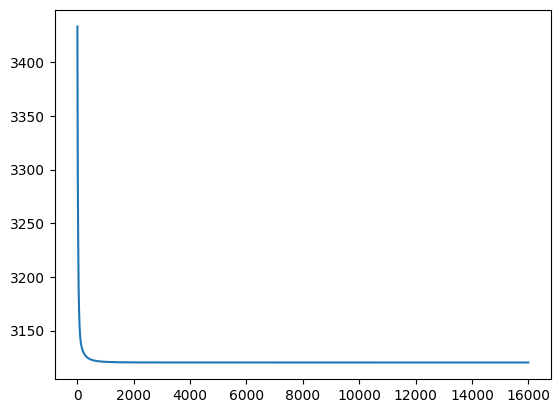

In [62]:
import matplotlib.pyplot as plt

plt.plot(train_MSEs)

In [63]:
# _,_,output = ffn.forward_pass(X_val)

In [64]:
# output

In [65]:
# MSE = np.mean((y_val-output)**2)

In [66]:
# MSE

In [67]:
# np.min(val_metrics)